In [1]:
import os
import glob
import wave
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
from IPython.display import display
from sklearn import model_selection

pd.options.display.max_colwidth = 100

# File paths

In [2]:
workspace = os.path.dirname(os.getcwd())
data_dir = os.path.join(workspace, 'ml-data/wav/')
file_name = 'kogara/kogara_gsqueal1-2.wav'
file_path = data_dir + file_name
print("file_path: ", file_path)

file_path:  /workspace/ml-data/wav/kogara/kogara_gsqueal1-2.wav


# Check wav data and melsp data

In [3]:
def load_wave_data(file_path):
    # sr: sampling rate
    x, fs = librosa.load(file_path, sr=44100)
    return x, fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    # dB
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft, n_mels=128)
    return melsp

def show_wave(x, fs):
    time = np.arange(0, len(x)) / fs
    plt.rcParams["figure.figsize"] = (15, 4)
    plt.plot(time, x)
    plt.xlabel("Time(s)")
    plt.ylabel("Sound Amplitude")
    plt.show()

def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs, x_axis='s', y_axis='frames')
    plt.colorbar()
    plt.show()

wave_size:(132300,)
melsp_size:(128, 1034)
sampling_rate:44100


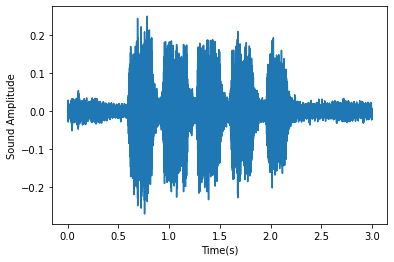

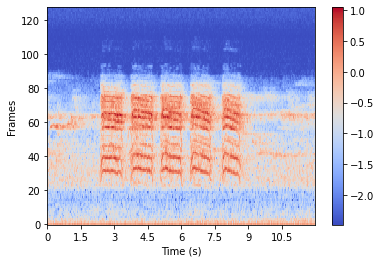

In [4]:
x, fs = load_wave_data(file_path)
melsp = calculate_melsp(x)
print("wave_size:{0}\nmelsp_size:{1}\nsampling_rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x, fs)
show_melsp(melsp, fs)
display(IPython.display.Audio(x, rate=fs))

# Dataframe

In [5]:
# set file path, file dir, file name, categories information to pandas dataframe
path = []
dirs = []
files = []
categories = []
bird_dirs = glob.glob(os.path.join(data_dir,'*'))
for bird_dir in bird_dirs:
    wav_paths = glob.glob(os.path.join(bird_dir,'*'))
    for wav_path in wav_paths:
        wav_file_name = wav_path.split('/')[-1]
        wav_file_dir = wav_path.replace(wav_file_name, '')
        path.append(wav_file_dir + wav_file_name)
        dirs.append(wav_file_dir)
        files.append(wav_file_name)
        categories.append(bird_dir.split('/')[-1])

In [6]:
meta_data = pd.DataFrame(list(zip(path, dirs, files, categories)), columns = ['paths', 'file_dirs', 'file_names', 'categories'])
# set unique id of categories
meta_data['target'] = meta_data['categories'].factorize()[0]

In [7]:
# add melsp and wav information
def func(row):
    _x, _fs = load_wave_data(row.paths)
    _melsp = calculate_melsp(_x)
    with wave.open(os.path.join(row.file_dirs, row.file_names), 'rb') as wr:
        _ch = wr.getnchannels()
        _width = wr.getsampwidth()
        _fr = wr.getframerate()
        _fn = wr.getnframes()
    return pd.Series([_x.shape, _fs, _melsp.shape, _ch, _width, _fr, _fn, _fn/_fr])

meta_data[['wav_shape', 'sample_rates', 'melsp_shape', 'wav_channels', 'wav_sample_size', 'wav_sampling_rate', 'wav_frame_rate', 'wav_time']] = meta_data.apply(func, axis=1)

In [8]:
meta_data.head(100)

paths  \
0    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-7.wav   
1    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal1-1.wav   
2    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-2.wav   
3    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal2-1.wav   
4    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal2-5.wav   
5    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal2-3.wav   
6    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-6.wav   
7    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-5.wav   
8    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-4.wav   
9    /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-1.wav   
10   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-3.wav   
11  /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-10.wav   
12   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal2-2.wav   
13   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal2-4.wav   
14   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal1-2.wav   
15   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-8.wav   
16   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal1-3.wav   
17   /workspace/ml-data/wav/sijuukara/sijuukara_gsqueal3-9.wav   
18         /workspace/ml-data/wav/kogara/kogara_gsqueal2-2.wav   
19         /workspace/ml-data/wav/kogara/kogara_gsqueal1-3.wav   
20         /workspace/ml-data/wav/kogara/kogara_twitter2-1.wav   
21         /workspace/ml-data/wav/kogara/kogara_gsqueal1-1.wav   
22         /workspace/ml-data/wav/kogara/kogara_gsqueal3-5.wav   
23         /workspace/ml-data/wav/kogara/kogara_gsqueal3-4.wav   
24         /workspace/ml-data/wav/kogara/kogara_gsqueal3-2.wav   
25         /workspace/ml-data/wav/kogara/kogara_gsqueal2-3.wav   
26         /workspace/ml-data/wav/kogara/kogara_twitter3-1.wav   
27         /workspace/ml-data/wav/kogara/kogara_twitter3-3.wav   
28         /workspace/ml-data/wav/kogara/kogara_gsqueal3-1.wav   
29         /workspace/ml-data/wav/kogara/kogara_gsqueal3-6.wav   
30         /workspace/ml-data/wav/kogara/kogara_gsqueal2-4.wav   
31         /workspace/ml-data/wav/kogara/kogara_gsqueal3-3.wav   
32         /workspace/ml-data/wav/kogara/kogara_twitter1-2.wav   
33         /workspace/ml-data/wav/kogara/kogara_gsqueal1-2.wav   
34         /workspace/ml-data/wav/kogara/kogara_twitter2-2.wav   
35         /workspace/ml-data/wav/kogara/kogara_twitter3-2.wav   
36         /workspace/ml-data/wav/kogara/kogara_gsqueal2-1.wav   
37         /workspace/ml-data/wav/kogara/kogara_twitter1-1.wav   

                            file_dirs                 file_names categories  \
0   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-7.wav  sijuukara   
1   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal1-1.wav  sijuukara   
2   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-2.wav  sijuukara   
3   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal2-1.wav  sijuukara   
4   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal2-5.wav  sijuukara   
5   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal2-3.wav  sijuukara   
6   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-6.wav  sijuukara   
7   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-5.wav  sijuukara   
8   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-4.wav  sijuukara   
9   /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-1.wav  sijuukara   
10  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-3.wav  sijuukara   
11  /workspace/ml-data/wav/sijuukara/  sijuukara_gsqueal3-10.wav  sijuukara   
12  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal2-2.wav  sijuukara   
13  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal2-4.wav  sijuukara   
14  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal1-2.wav  sijuukara   
15  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-8.wav  sijuukara   
16  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal1-3.wav  sijuukara   
17  /workspace/ml-data/wav/sijuukara/   sijuukara_gsqueal3-9

# Augumentation

In [9]:
# add white noise
# randn:平均0、分散1 引数はサイズ
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [10]:
# shift sound in timeframe
# rollでいいのか検討
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [11]:
# stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    # Time-stretch an audio series by a fixed rate.
    x = librosa.effects.time_stretch(x, rate)
    if len(x) > input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(1, input_length - len(x))), "constant")

# Training dataset and test dataset

In [12]:
x = list(meta_data.loc[:,"paths"])
y = list(meta_data.loc[:,"target"])

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)

In [14]:
# check data length
print('x_train data length:\t{}\ny_train data length:\t{}\nx_test data length:\t{}\ny_test data length:\t{}'.format(len(x_train),
                                                                                                                    len(y_train),
                                                                                                                    len(x_test),
                                                                                                                    len(y_test)))

x_train data length:	28
y_train data length:	28
x_test data length:	10
y_test data length:	10


In [15]:
# check test data classes
a = np.zeros(2)
for c in y_test:
    a[c] += 1
print(a)

[5. 5.]


# Transform wav to mel-stft array

In [16]:
# this parameter decied input data size
# frequency: vertical axis
freq = 128
# time: horizontal axis
time = 1723

In [17]:
# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
    np_data = np.zeros(len(x)*freq*time).reshape(len(x), freq, time)
    np_targets = np.zeros(len(y))
    for i in range(len(y)):
        _x, _fs = load_wave_data(x[i])
        # modify input scale freq*time
        if len(_x) < freq*time:
            _x = np.pad(_x, (0, freq*time-len(_x)-1), "constant")
        if aug is not None:
            _x = aug(x=_x, rate=rates[i])
        _x = calculate_melsp(_x)
        np_data[i] = _x
        np_targets[i] = y[i]
    np.savez(filename, x=np_data, y=np_targets)

In [18]:
# save test dataset
if not os.path.exists("../ml-data/test/test.npz"):
    save_np_data("../ml-data/test/test.npz", x_test, y_test)

In [19]:
# save raw training dataset
if not os.path.exists("../ml-data/train/train_raw.npz"):
    save_np_data("../ml-data/train/train_raw.npz", x_train,  y_train)

In [20]:
# save training dataset with white noise
if not os.path.exists("../ml-data/train/train_wn.npz"):
    rates = np.random.randint(1,50,len(x_train))/10000
    save_np_data("../ml-data/train/train_wn.npz", x_train, y_train, aug=add_white_noise, rates=rates)

In [21]:
# save training dataset with sound shift
if not os.path.exists("../ml-data/train/train_ss.npz"):
    rates = np.random.choice(np.arange(2,6),len(y_train))
    save_np_data("../ml-data/train/train_ss.npz", x_train, y_train, aug=shift_sound, rates=rates)

In [22]:
# save training dataset with stretch
if not os.path.exists("../ml-data/train/train_st.npz"):
    rates = np.random.choice(np.arange(80,120),len(y_train))/100
    save_np_data("../ml-data/train/train_st.npz", x_train, y_train, aug=stretch_sound, rates=rates)

/tmp/ipykernel_14/3051019082.py:5: FutureWarning: Pass rate=0.97 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.effects.time_stretch(x, rate)
/tmp/ipykernel_14/3051019082.py:5: FutureWarning: Pass rate=1.06 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.effects.time_stretch(x, rate)
/tmp/ipykernel_14/3051019082.py:5: FutureWarning: Pass rate=1.05 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.effects.time_stretch(x, rate)
/tmp/ipykernel_14/3051019082.py:5: FutureWarning: Pass rate=1.14 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.effects.time_stretch(x, rate)
/tmp/ipykernel_14/3051019082.py:5: FutureWarning: Pass rate=0.91 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.

In [23]:
# save training dataset with combination of white noise and shift or stretch
if not os.path.exists("../ml-data/train/train_com.npz"):
    np_data = np.zeros(freq*time*len(x_train)).reshape(len(x_train), freq, time)
    np_targets = np.zeros(len(y_train))
    for i in range(len(y_train)):
        x, fs = load_wave_data(x_train[i])
        x = add_white_noise(x=x, rate=np.random.randint(1,50)/1000)
        if np.random.choice((True,False)):
            x = shift_sound(x=x, rate=np.random.choice(np.arange(2,6)))
        else:
            x = stretch_sound(x=x, rate=np.random.choice(np.arange(80,120))/100)
        if len(x) < freq*time:
            x = np.pad(x, (0, freq*time-len(x)-1), "constant")
        x = calculate_melsp(x)
        np_data[i] = x
        np_targets[i] = y_train[i]
    np.savez("../ml-data/train/train_com.npz", x=np_data, y=np_targets)

# Audio classification with deep learning

# Preparation for deep learning

In [24]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [25]:
# dataset files
train_files = ["train_raw.npz", 
               "train_ss.npz",
               "train_st.npz", 
               "train_wn.npz",
               "train_com.npz"]
test_file = "test.npz"

In [26]:
train_num = 28
test_num = 10

In [27]:
# define dataset placeholders
x_train = np.zeros(freq*time*train_num*len(train_files)).reshape(train_num*len(train_files), freq, time)
y_train = np.zeros(train_num*len(train_files))

In [28]:
# load dataset
for i in range(len(train_files)):
    data = np.load(train_files[i])
    x_train[i*train_num:(i+1)*train_num] = data["x"]
    y_train[i*train_num:(i+1)*train_num] = data["y"]

In [29]:
# load test dataset
test_data = np.load(test_file)
x_test = test_data["x"]
y_test = test_data["y"]

In [30]:
# redefine target data into one hot vector
# 出力側の形状を整えた
classes = 2
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

In [31]:
# reshape training dataset
# 入力側の形状を整えた
x_train = x_train.reshape(train_num*5, freq, time, 1)
x_test = x_test.reshape(test_num, freq, time, 1)

In [32]:
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(x_train.shape,
                                                                y_train.shape, 
                                                                x_test.shape, 
                                                                y_test.shape))

x train:(140, 128, 1723, 1)
y train:(140, 2)
x test:(10, 128, 1723, 1)
y test:(10, 2)


# Define convolutional neural network

In [33]:
def cba(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [34]:
# define CNN
inputs = Input(shape=(x_train.shape[1:]))

x_1 = cba(inputs, filters=32, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=32, kernel_size=(8,1), strides=(2,1))
x_1 = cba(x_1, filters=64, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=64, kernel_size=(8,1), strides=(2,1))

x_2 = cba(inputs, filters=32, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=32, kernel_size=(16,1), strides=(2,1))
x_2 = cba(x_2, filters=64, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=64, kernel_size=(16,1), strides=(2,1))

x_3 = cba(inputs, filters=32, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=32, kernel_size=(32,1), strides=(2,1))
x_3 = cba(x_3, filters=64, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=64, kernel_size=(32,1), strides=(2,1))

x_4 = cba(inputs, filters=32, kernel_size=(1,64), strides=(1,2))
x_4 = cba(x_4, filters=32, kernel_size=(64,1), strides=(2,1))
x_4 = cba(x_4, filters=64, kernel_size=(1,64), strides=(1,2))
x_4 = cba(x_4, filters=64, kernel_size=(64,1), strides=(2,1))

x = Add()([x_1, x_2, x_3, x_4])

x = cba(x, filters=128, kernel_size=(1,16), strides=(1,2))
x = cba(x, filters=128, kernel_size=(16,1), strides=(2,1))

x = GlobalAveragePooling2D()(x)
x = Dense(classes)(x)
x = Activation("softmax")(x)

model = Model(inputs, x)
model.summary()

2022-06-15 14:29:42.471952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 14:29:42.520285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 14:29:42.520560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 14:29:42.520878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 1723,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 128, 862, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 128, 862, 32  544         ['input_1[0][0]']                
                                )                                                             

# Optimization and callbacks

In [44]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.00001, decay=1e-6, amsgrad=True)

# Let's train the model using Adam with amsgrad
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [45]:
# directory for model checkpoints
model_dir = "../ml-data/models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# early stopping and model checkpoint# early  
es_cb = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
chkpt = os.path.join(model_dir, 'esc50_.{epoch:02d}_{val_loss:.4f}_{val_acc:.4f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# Train CNN model with between class dataset

In [46]:
# between class data generator
class MixupGenerator():
    def __init__(self, x_train, y_train, batch_size=16, alpha=0.2, shuffle=True):
        self.x_train = x_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.alpha = alpha
        self.shuffle = shuffle
        self.sample_num = len(x_train)

    def __call__(self):
        while True:
            indexes = self.__get_exploration_order()
            itr_num = int(len(indexes) // (self.batch_size * 2))

            for i in range(itr_num):
                batch_ids = indexes[i * self.batch_size * 2:(i + 1) * self.batch_size * 2]
                x, y = self.__data_generation(batch_ids)

                yield x, y

    def __get_exploration_order(self):
        indexes = np.arange(self.sample_num)

        if self.shuffle:
            np.random.shuffle(indexes)

        return indexes

    def __data_generation(self, batch_ids):
        _, h, w, c = self.x_train.shape
        _, class_num = self.y_train.shape
        x1 = self.x_train[batch_ids[:self.batch_size]]
        x2 = self.x_train[batch_ids[self.batch_size:]]
        y1 = self.y_train[batch_ids[:self.batch_size]]
        y2 = self.y_train[batch_ids[self.batch_size:]]
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)
        x_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        x = x1 * x_l + x2 * (1 - x_l)
        y = y1 * y_l + y2 * (1 - y_l)

        return x, y

In [47]:
# train model
batch_size = 10
epochs = 1000

training_generator = MixupGenerator(x_train, y_train)()
model.fit_generator(generator=training_generator,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, 
                    verbose=1,
                    shuffle=True,
                    callbacks=[es_cb, cp_cb])

Epoch 1/1000


/tmp/ipykernel_14/1780721020.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=training_generator,


14/14 [==============================] - ETA: 0s - loss: 0.5461 - acc: 0.6964
Epoch 1: val_loss improved from inf to 0.68339, saving model to ../ml-data/models/esc50_.01_0.6834_0.5000.hdf5
14/14 [==============================] - 14s 928ms/step - loss: 0.5461 - acc: 0.6964 - val_loss: 0.6834 - val_acc: 0.5000
Epoch 2/1000
14/14 [==============================] - ETA: 0s - loss: 0.5204 - acc: 0.7277
Epoch 2: val_loss did not improve from 0.68339
14/14 [==============================] - 13s 895ms/step - loss: 0.5204 - acc: 0.7277 - val_loss: 0.6848 - val_acc: 0.5000
Epoch 3/1000
14/14 [==============================] - ETA: 0s - loss: 0.5184 - acc: 0.7723
Epoch 3: val_loss did not improve from 0.68339
14/14 [==============================] - 13s 896ms/step - loss: 0.5184 - acc: 0.7723 - val_loss: 0.7063 - val_acc: 0.5000
Epoch 4/1000
14/14 [==============================] - ETA: 0s - loss: 0.4921 - acc: 0.7500
Epoch 4: val_loss did not improve from 0.68339
14/14 [========================

# Evaluate model

In [52]:
model = load_model("../ml-data/models/esc50_.72_0.0185_1.0000.hdf5")

In [53]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

1/1 [==============================] - 0s 338ms/step - loss: 0.0063 - acc: 1.0000
[0.006267399527132511, 1.0]
